### Driver Data with K-means clustering

In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # for plot styling
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
# load dataset

df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [5]:
df.isna().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [8]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [10]:
df1 = df.drop('id', axis = 1)

In [9]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=2)

In [12]:
kmeans.fit(df1)

KMeans(n_clusters=2)

In [13]:
kmeans.cluster_centers_  # gives cords of cluster center

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [14]:
kmeans.labels_    # predicted class labels

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
print(len(kmeans.labels_))

4000


In [16]:
# to check how many drivers are there in 1st and 2nd cluster
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


In [17]:
df1['clusters'] = kmeans.labels_

In [18]:
df1.head()

,mean_dist_day,mean_over_speed_perc,clusters
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


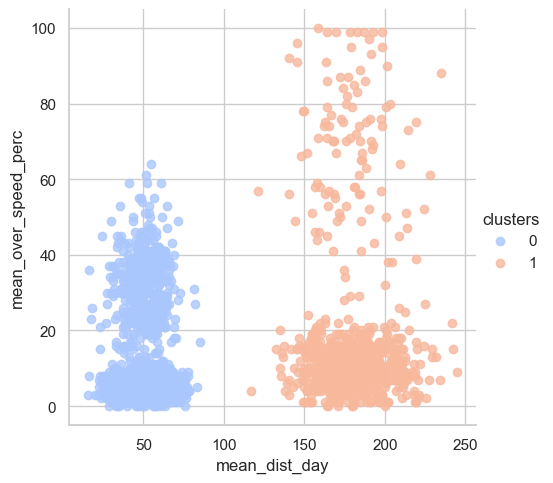

In [21]:
# plot the lmplot

sns.set_style('whitegrid')
sns.lmplot(x = 'mean_dist_day', y = 'mean_over_speed_perc',data = df1,hue = 'clusters',
           palette = 'coolwarm', aspect = 1, fit_reg=False)

by seeing we can assume that there may be around 4 clusters

In [22]:
kmeans_4 = KMeans(n_clusters=4)

In [23]:
kmeans_4.fit(df.drop('id', axis=1))

KMeans(n_clusters=4)

In [24]:
print(kmeans_4.cluster_centers_)

[[180.34311782  10.52011494]
 [ 49.99263253   5.20447169]
 [177.83509615  70.28846154]
 [ 50.40482436  32.36533958]]


In [25]:
unique4, counts4 = np.unique(kmeans_4.labels_, return_counts=True)

In [26]:
print(dict(zip(unique4, counts4)))

{0: 696, 1: 2773, 2: 104, 3: 427}


In [27]:
df1['cluster'] = kmeans_4.labels_

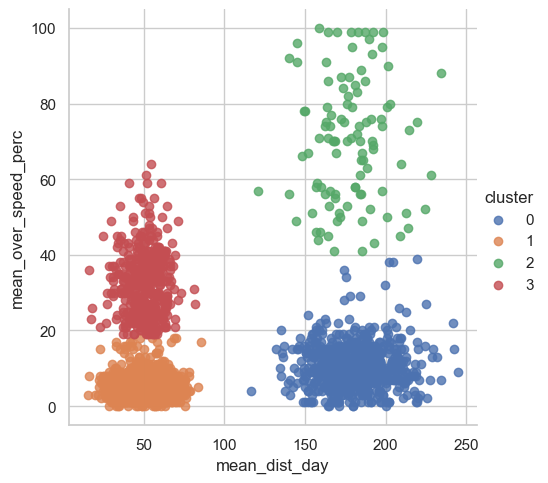

In [30]:
# plot the lmplot

sns.set_style('whitegrid')
sns.lmplot(x = 'mean_dist_day', y = 'mean_over_speed_perc',data = df1,hue = 'cluster',
           aspect = 1, fit_reg=False)

### Elbow Method

In [32]:
wcsse = []
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(df.drop('id',axis=1))
    wcsse.append(model.inertia_)

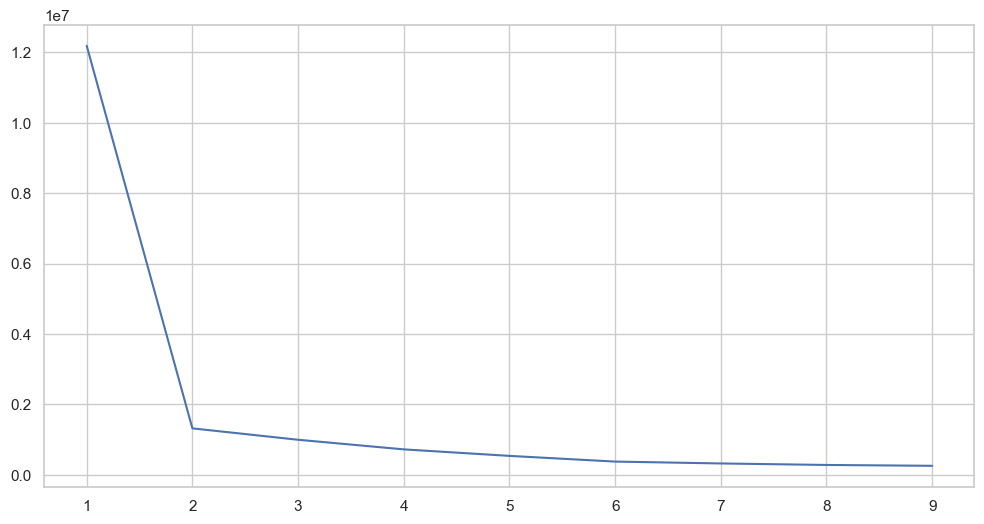

In [33]:
plt.plot(range(1,10), wcsse)

as we can see, we have sharp bend or elbow at 2so we can chose k as 2